(<Figure size 1000x600 with 1 Axes>,
 <AxesSubplot:xlabel='Drug concentration ($\\mathrm{\\mu}$g/mL)', ylabel='Growth rate (hr$^{-1})$'>)

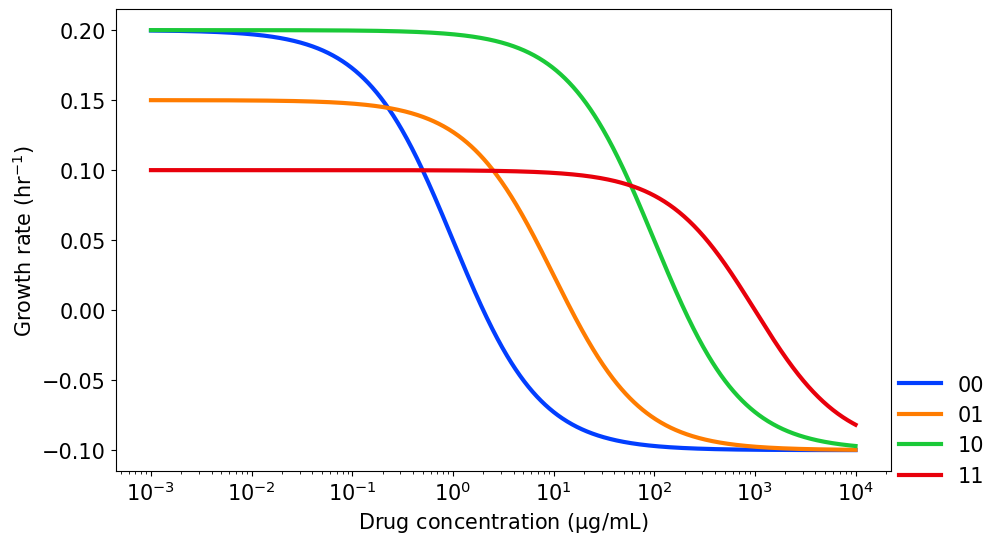

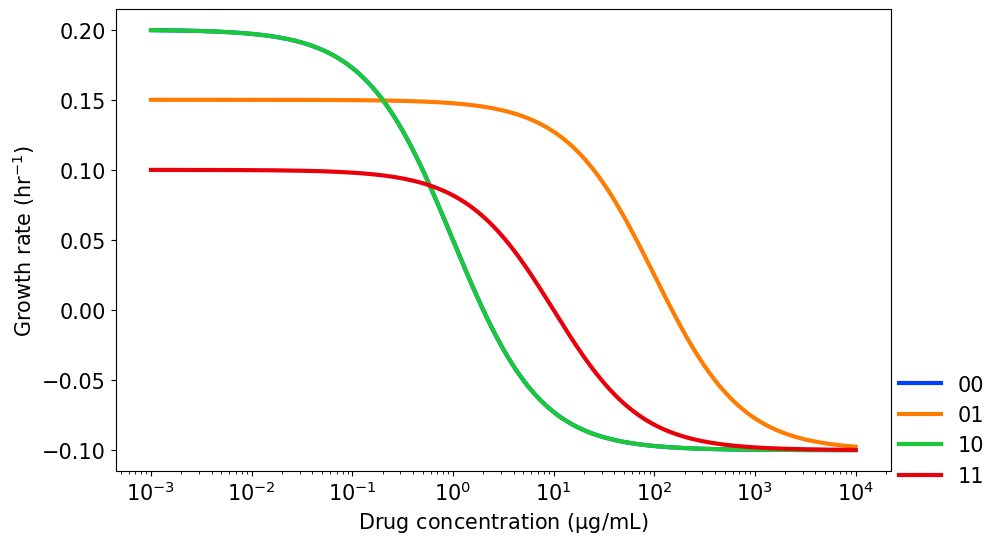

In [1]:
from fears_md.population import Population
from fears_md.utils import fitness
import matplotlib.pyplot as plt
import numpy as np

n_timestep = 1000

drug_impulse_dict = {}

# give 0.1 dose of osimertinib every 24 hours for the first 500 hours
dc = np.zeros(n_timestep)
for i in range(0,500):
    if np.mod(i,24) == 0:
        dc[i] = 0.1

drug_impulse_dict['osimertinib'] = dc

# give 1 dose of gefitinib every 24 hours for the second 500 hours
dc = np.zeros(n_timestep)
for i in range(500,1000):
    if np.mod(i,24) == 0:
        dc[i] = 1

drug_impulse_dict['gefitinib'] = dc

init_counts = np.array([10**6,0,0,0])

p = Population(drug_impulse_dict=drug_impulse_dict,n_timestep=n_timestep,
               pharmacokinetics_file='../fears_md/data/pharmacokinetics_library.xlsx',
               pharmacodynamics_file='../fears_md/data/pharmacodynamics_library.xlsx',
               n_sims=1,
               mut_rate=10**-6,
               death_rate=0.001, # baseline cell turnover
               init_counts=init_counts,plot=True,
               death_model='pharmacodynamic', # includes drug-induced cell death
               debug=False)

# plot the fitness landscapes
p.plot_fitness_curves('osimertinib')
p.plot_fitness_curves('gefitinib')

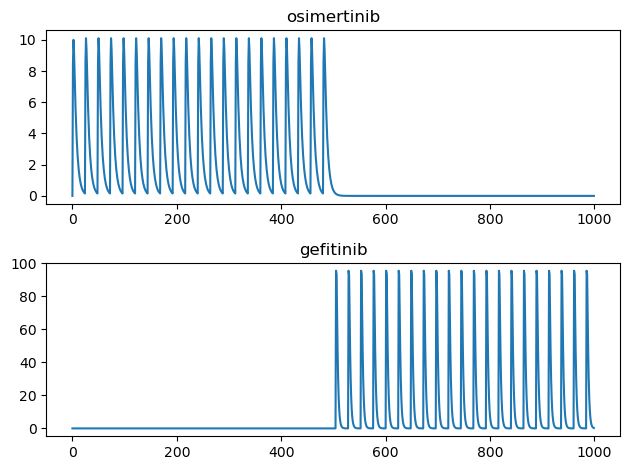

In [7]:
# plot the drug curves

fig,ax_list = plt.subplots(nrows=2)

ax = ax_list[0]
dc = p.drug_curve_dict['osimertinib']
ax.plot(dc,label='osimertinib')
ax.set_title('osimertinib')

ax = ax_list[1]
dc = p.drug_curve_dict['gefitinib']
ax.plot(dc,label='gefitinib')
ax.set_title('gefitinib')

fig.tight_layout()

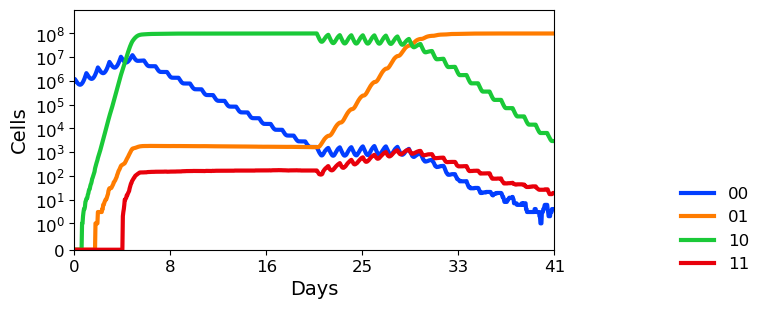

In [2]:
p.simulate();